# INSTALL DEPENDENCIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
colorImg = cv2.imread(r'../../Downloads/download.png')
grayImgBGR = cv2.imread(r'../../Downloads/puppy.jpeg', cv2.IMREAD_GRAYSCALE)

/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


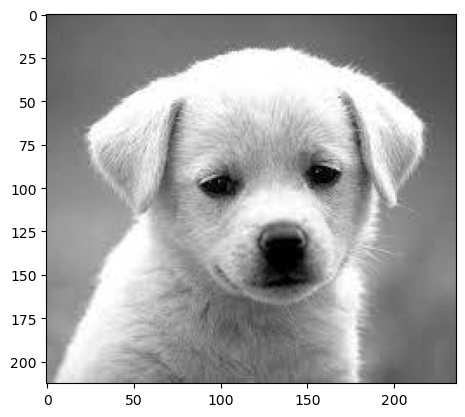

In [4]:
plt.imshow(grayImgBGR, cmap='gray')

213 236


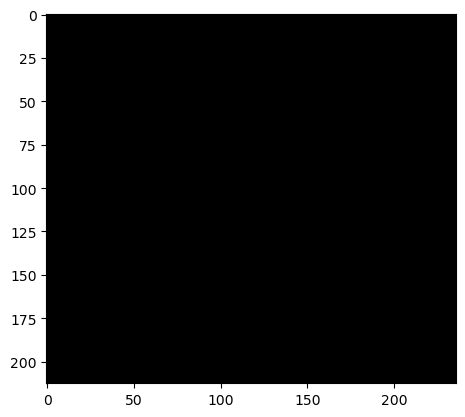

In [6]:
numRows = grayImgBGR.shape[0]
numCols = grayImgBGR.shape[1]
print(numRows, numCols)
grayImgBGR_2 = np.zeros((numRows, numCols))
plt.imshow(grayImgBGR_2, cmap="gray")

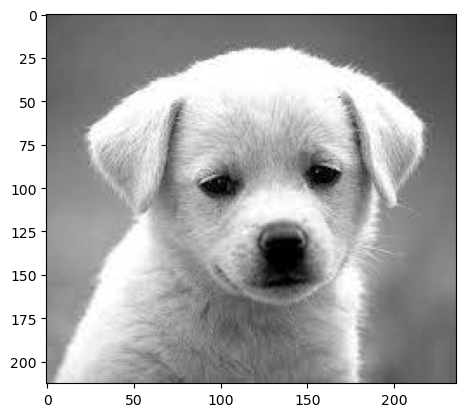

In [9]:
for i in range(numRows):
    for j in range(numCols):
        grayImgBGR_2[i,j] = grayImgBGR[i,j]
plt.imshow(grayImgBGR_2, cmap='gray')

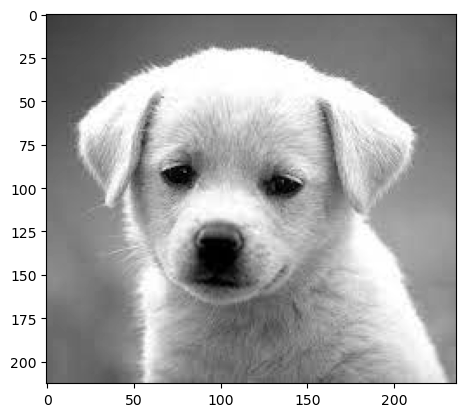

In [94]:
for i in range(numRows):
    for j in range(numCols):
        grayImgBGR_2[i,j] = grayImgBGR[(i),numCols-j-1]
plt.imshow(grayImgBGR_2, cmap='gray')

In [28]:
import matplotlib as mpl
def displayImageInActualSize(img):
    dpi = mpl.rcParams['figure.dpi']
    H, W = img.shape
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    plt.show

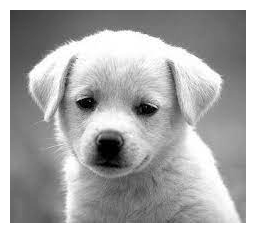

In [29]:
displayImageInActualSize(grayImgBGR_2)

In [97]:
S = np.array([[2,0],[0,2]])
I2 = np.zeros((2 * numRows, 2 * numCols), dtype='uint8')
for i in range(numRows):
    for j in range(numCols):
        P = np.array([i, j])
        P_dash = S.dot(P)
        new_i, new_j = P_dash[0], P_dash[1]
        I2[new_i, new_j] = grayImgBGR[i, j]
print(I2.shape)

(426, 472)


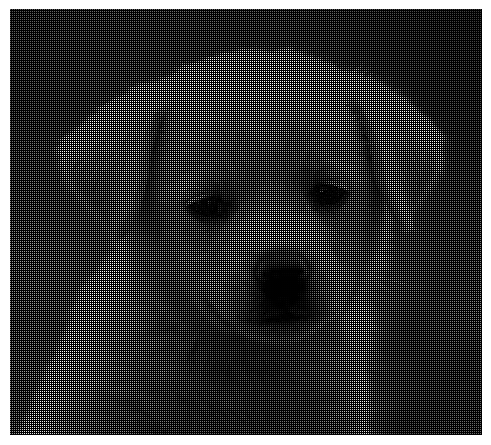

In [31]:
displayImageInActualSize(I2)

In [48]:
p = np.array([2,4])
Sx, Sy = 2, 0.1
s = np.array([[Sx, 1], [1, Sy]])
P_ = s.dot(p)
print(P_)

[8.  2.4]


# INVERSE SCALING

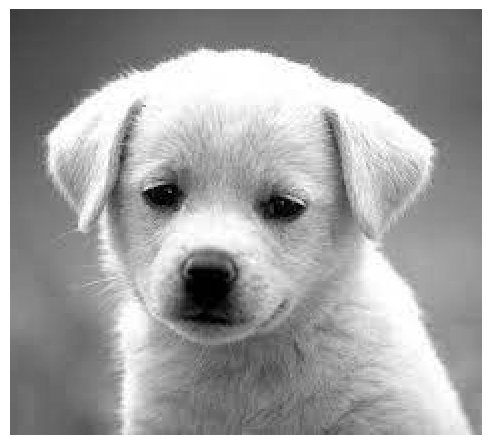

In [118]:
S = np.array([[2,0],[0,2]])
I2 = np.zeros((S[0][0] * numRows, S[1][1] * numCols), dtype='uint8')
Tinv = np.linalg.inv(S)
for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        P_dash = np.array([new_i, new_j])
        P = Tinv.dot(P_dash)
        P = np.int16(np.floor(P))
        i, j = P[0], P[1]
        if i<0 or i>=numRows or j<0 or j >= numCols:
            pass
        else:
            I2[new_i, new_j] = grayImgBGR_2[i,j]

displayImageInActualSize(I2)

In [113]:
I2 = np.ones((S[0][0] * numRows, S[1][1] * numCols), dtype='uint8') * 256

In [114]:
I2

array([[256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256],
       ...,
       [256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256]], dtype=uint16)

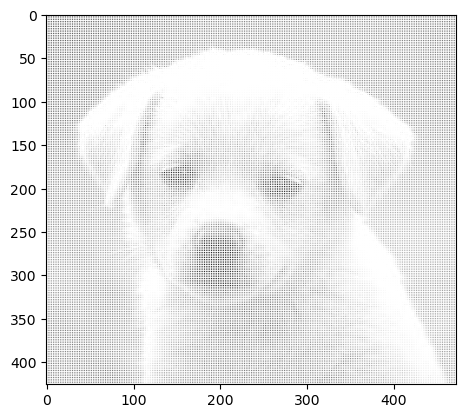

In [115]:
for i in range(numRows):
    for j in range(numCols): 
        P = np.array([i, j])
        P_dash = S.dot(P)
        new_i, new_j = P_dash[0], P_dash[1]
        I2[new_i, new_j] = grayImgBGR_2[i, j]
plt.imshow(I2, cmap='gray')